# Extraction des séquences codantes (CDS) annotées sur le génome de la levure *Saccharomyces Cerevisiae*
    
## Enoncé du mini-projet

Le fichier [S_cerevisiae_chromosomes.fna](./S_cerevisiae_chromosomes.fna) contient les 16 **séquences chromosomiques** de la levure *Saccharomyces cerevisiae*.

```
>BK006935.2 TPA_inf: Saccharomyces cerevisiae S288c chromosome I, complete sequence
ccacaccacacccacacacccacacaccacaccacacaccacaccacacccacacacacacatCCTAACACTACCCTAAC
ACAGCCCTAATCTAACCCTGGCCAACCTGTCTCTCAACTTACCCTCCATTACCCTGCCTCCACTCGTTACCCTGTCCCAT
TCAACCATACCACTCCGAACCACCATCCATCCCTCTACTTACTACCACTCACCCACCGTTACCCTCCAATTACCCATATC
...
```

Le fichier [S_cerevisiae_annotations.gff](./S_cerevisiae_annotations.gff) contient l’**annotation** du génome de la levure *Saccharomyces cerevisiae*.

```
##gff-version 3
#!gff-spec-version 1.20
#!processor NCBI annotwriter
#!genome-build R64-1-1
#!genome-build-accession NCBI_Assembly:GCA_000146045.2
##sequence-region BK006935.2 1 230218
##species http://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=559292
BK006935.2	tpg	region	1	230218	.	+	.	ID=id0;Dbxref=taxon:559292;Name=I;chromosome=I;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=S288c
BK006935.2	tpg	region	1	801	.	-	.	ID=id1;Dbxref=SGD:S000028862;Note=TEL01L%3B Telomeric region on the left arm of Chromosome I%3B composed of an X element core sequence%2C X element combinatorial repeats%2C and a short terminal stretch of telomeric repeats;gbkey=telomere
BK006935.2	tpg	gene	1807	2169	.	-	.	ID=gene0;Name=PAU8;gbkey=Gene;gene=PAU8;locus_tag=YAL068C
BK006935.2	tpg	mRNA	1807	2169	.	-	.	ID=rna0;Parent=gene0;gbkey=mRNA;gene=PAU8;product=seripauperin PAU8
BK006935.2	tpg	exon	1807	2169	.	-	.	ID=id3;Parent=rna0;gbkey=mRNA;gene=PAU8;product=seripauperin PAU8
BK006935.2	tpg	CDS	1807	2169	.	-	0	ID=cds0;Parent=rna0;Dbxref=SGD:S000002142,NCBI_GP:DAA06918.1;Name=DAA06918.1;Note=hypothetical protein%3B member of the seripauperin multigene family encoded mainly in subtelomeric regions;gbkey=CDS;gene=PAU8;product=seripauperin PAU8;protein_id=DAA06918.1
...
```

L'objectif de cet exercice est de créer un **fichier multi-FASTA** contenant les **séquences** des **CDS** annotées (3e colonne contient "CDS").

Vous trouverez le **nom de la séquence de référence** (1e colonne), les **positions de début** (4e colonne) et **de fin** (5e colonne), le **sens** de la séquence (7e colonne) ainsi que l'**identifiant** associé à la séquence codante (sous-partie "ID=" de la 9e colonne) dans le fichier d'annotation.

Vous pourrez ainsi récupérer la portion de séquence d'intérêt dans le fichier multi-FASTA.

**Exemple de sortie :**

```
>cds0
ATGGTCAAATTAACTTCAATCGCCGCTGGTGTCGCTGCCATCGCTGCTACTGCTTCTGCA
ACCACCACTCTAGCTCAATCTGACGAAAGAGTCAACTTGGTGGAATTGGGTGTCTACGTC
TCTGATATCAGAGCTCACTTAGCCCAATACTACATGTTCCAAGCCGCCCACCCAACTGAA
ACCTACCCAGTCGAAGTTGCTGAAGCCGTTTTCAACTACGGTGACTTCACCACCATGTTG
ACCGGTATTGCTCCAGACCAAGTGACCAGAATGATCACCGGTGTTCCATGGTACTCCAGC
AGATTAAAGCCAGCCATCTCCAGTGCTCTATCCAAGGACGGTATCTACACTATCGCAAAC
TAG
```

## Import des librairies

Voici les librairies qui peuvent vous être utiles.

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
import matplotlib.pyplot as plt
# je rajoute numpy pour la création de l'histogramme
import numpy as np

## Lecture du fichier multi-FASTA

La lecture du fichier multi-FASTA peut se faire de différentes manières. Au choix, vous pouvez utiliser :

1. [Biopython](https://biopython.org/)

Utiliser l'interface [SeqIO](https://biopython.org/wiki/SeqIO) de [Biopython](https://biopython.org/) afin de convertir le fichier multi-FASTA contenant les séquences de référence en dictionnaire.

2. les fonctionnalités de base du langage Python

_Principales étapes :_

* parcourir en lecture le fichier multi-FASTA,
* créer un dictionnaire (clé : nom de la séquence chromosomique , valeur : séquence chromosomique).

**Point d'attention :** dans un fichier au format FASTA, la séquence peut être sur plusieurs lignes.

Création du dictionnaire contenant le fichier multi-FASTA

In [23]:
# on définit le dictionnaire vide qu'on va remplir avec les clés correspondant au header du fasta et les valeurs correspondant aux séquences
chromo_dict = {}
# on parcours le fichier fasta ligne par ligne
with open("S_cerevisiae_chromosomes.fna", "r") as fasta_file:
    # on crée une chaine de charactère vide qui correspondra à la clé du dictionnaire pour chaque séquence 
    fasta_id = ""
    # on lit le fichier fasta ligne par ligne avec une boucle
    for line in fasta_file:
        # si la ligne commence par ">" on définit fasta_id avec la valeur de la ligne et 
        # on garde seulement le ID de la séquence en gardant uniquement le premier élément avant le premier espace 
        if line.startswith(">"):
            fasta_id = line[1:].split()[0]
            # on définit la valeur de clé comme étant nulle 
            chromo_dict[fasta_id] = ""
        # on redéfinit la valeur de la clé en récupérant la séquence (ie toutes les lignes après la ligne avec > jusqu'à la prochaine ligne avec >) en enlevant les retours à la ligne
        else:
            chromo_dict[fasta_id] += line.strip()

On vérifie qu'on a bien crée un dictionnaire

In [24]:
type(chromo_dict)

dict

On vérifie que les clés du dictionnaire correspondent bien aux séquences ID des 16 séquences fasta

In [25]:
chromo_dict.keys()

dict_keys(['BK006935.2', 'BK006936.2', 'BK006937.2', 'BK006938.2', 'BK006939.2', 'BK006940.2', 'BK006941.2', 'BK006934.2', 'BK006942.2', 'BK006943.2', 'BK006944.2', 'BK006945.2', 'BK006946.2', 'BK006947.3', 'BK006948.2', 'BK006949.2'])

## Lecture du fichier GFF3

### Création du *dataframe*

Créer un *dataframe* avec la librairie [Pandas](https://python.sdv.univ-paris-diderot.fr/17_modules_interet_bioinfo/#174-module-pandas) à partir du fichier au [format GFF3](http://gmod.org/wiki/GFF3) contenant l'annotation.

Les colonnes seront nommées de la manière suivante pour plus de lisibilité :

* colonne 1 : seqname
* colonne 2 : source
* colonne 3 : type
* colonne 4 : start
* colonne 5 : end
* colonne 6 : score
* colonne 7 : strand
* colonne 8 : frame
* colonne 9 : attributes

On crée le dataframe en précisant le séparateur entre les colonnes (ici la tabulation) sans garder les lignes commencant par #

In [12]:
gff_df = pd.read_csv("S_cerevisiae_annotations.gff", sep= "\t", comment="#")

In [14]:
# On regarde le début du dataframe
gff_df.head()

,BK006935.2,tpg,region,1,230218,.,+,..1,ID=id0;Dbxref=taxon:559292;Name=I;chromosome=I;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=S288c
0,BK006935.2,tpg,region,1,801,.,-,.,ID=id1;Dbxref=SGD:S000028862;Note=TEL01L%3B Te...
1,BK006935.2,tpg,region,707,776,.,+,.,ID=id2;Dbxref=SGD:S000121252;Note=ARS102~Auton...
2,BK006935.2,tpg,gene,1807,2169,.,-,.,ID=gene0;Name=PAU8;gbkey=Gene;gene=PAU8;locus_...
3,BK006935.2,tpg,mRNA,1807,2169,.,-,.,ID=rna0;Parent=gene0;gbkey=mRNA;gene=PAU8;prod...
4,BK006935.2,tpg,exon,1807,2169,.,-,.,ID=id3;Parent=rna0;gbkey=mRNA;gene=PAU8;produc...


In [15]:
# On regarde ses dimensions (nombre de lignes, nombre de colonnes)
gff_df.shape

(26305, 9)

In [16]:
# On regarde quel est le type de chaque colonne
gff_df.dtypes

BK006935.2                                                                                                      object
tpg                                                                                                             object
region                                                                                                          object
1                                                                                                                int64
230218                                                                                                           int64
.                                                                                                               object
+                                                                                                               object
..1                                                                                                             object
ID=id0;Dbxref=taxon:559292;Name=I;chromosome=I;g

In [17]:
# On change le nom des colonnes
gff_df.columns = ["seqname", "source", "type", "start", "end", "score", "strand", "frame", "attributes"]

In [18]:
# On vérifie que le changement est OK
gff_df.columns

Index(['seqname', 'source', 'type', 'start', 'end', 'score', 'strand', 'frame',
       'attributes'],
      dtype='object')

### Filtrage du *dataframe*

Filtrer le *dataframe* afin de ne conserver que les *features* de type **CDS** et les colonnes d'intérêt suivantes :

* seqname : identifiant de la séquence de référence
* start : position de début de la séquence codante
* end : position de fin de la séquence codante
* strand : brin de la séquence codante
* attributes : informations supplémentaires dont l'identifiant (ID) de la séquence

In [19]:
# On utilise les booléens (gff_df["type"] == "CDS" ===> qui dit pour chaque position si c'est TRUE ou FALSE) pour garder seulement les lignes qui ont dans la colonne type le feature CDS
gff_df_CDS = gff_df[gff_df["type"] == "CDS"]
# On garder seulement les 5 colonnes suivantes
gff_df_CDS = gff_df_CDS[["seqname", "start", "end", "strand", "attributes"]]
# On regarde les dimensions de notre nouveau dataframe (nombre de lignes, nombre de colonnes)
gff_df_CDS.shape

(6220, 5)

## Ecriture du fichier multi-FASTA

La sortie attendue doit contenir l'ensemble des séquences codantes (CDS) du génome au **format FASTA**. Les informations de chaque CDS présentes dans le *dataframe* vont permettre d'extraire leurs séquences à partir du dictionnaire contenant les séquences de référence.

Grâce aux positions de début et de fin du *feature* de type CDS, vous pouvez extraire sa séquence à partir du dictionnaire préalablement créé. Dans le cas où l'élement est positionné sur le brin -, il faudra "inverse complémenter" la séquence :

```
séquence initiale :               5'-ATGC-3'
séquence complémentaire :         3'-TACG-5'
séquence inverse complémentaire : 5'-GCAT-3'
```

Plusieurs possibilités s'offrent à vous :

1. Si vous avez utilisé [Biopython](https://biopython.org/) pour lire le fichier multi-FASTA, utiliser également l'interface [SeqIO](https://biopython.org/wiki/SeqIO) et l'objet [SeqRecord](https://biopython.org/wiki/SeqRecord) de [Biopython](https://biopython.org/) afin d'écrire le fichier de sortie au format attendu. La fonction `reverse_complement()` vous sera d'une grande aide.

2. Si vous n'avez pas utilisé [Biopython](https://biopython.org/) pour lire le fichier multi-FASTA, implémenter vous-même le *reverse complement* avec les fonctionnalités de base du langage Python.

In [27]:
# On définit le dictionnaire vide que l'on va remplir au fur et à mesure à l'aide de la boucle for
cds_dict={}
# On fait la boucle en itérant sur chaque index du fichier gff_CDS (fichier contenant seulement les séquences codantes CDS)
for ind in gff_df_CDS.index:
	# 1- On initialize les arguments avec:
    # seq qui est le nom de la séquence où le CDS se trouve
    seq = gff_df_CDS["seqname"][ind]
    # start_seq et end_seq qui sont les positions correspondant à la séquence du CDS sur les chromosomes
    start_seq= gff_df_CDS["start"][ind] - 1
    end_seq= gff_df_CDS["end"][ind]
    # strand qui décrit si la séquence est le brin sens (+) ou antisens (-)
    strand = gff_df_CDS["strand"][ind]
    # 2- On crée une clé contenant le nom du CDS (cds0, cds1, ...)  
    # on s'assure que la séquence est bien dans le dictionnaire contenant les séquences chromosomiques
    if seq in chromo_dict:
        # on récupère la colonne attributes qui contient le nom du CDS (cds0, cds1, ...) avec d'autres infos
        cds_id_tmp = gff_df_CDS["attributes"][ind]
        # on garde seulement le nom du CDS (ie on enlève tous ce qui est après ID=cdsx)
        cds_id = cds_id_tmp.split(";", maxsplit=1) 
        cds_id = cds_id[0]
        # on enlève le ID= pour garder que cdsx
        cds_id = cds_id.replace("ID=","")
        # on crée pour chaque CDS sa valeur dans le dictionnaire (ie la séquence fasta du chromosome correspondante)
        cds_dict[cds_id] = chromo_dict[seq]
        # on coupe la séquence aux position start et end
        cds_dict[cds_id] = cds_dict[cds_id][start_seq:end_seq]
        # 3- On reverse-complement la séquence du CDS si elle correspond au brin anti-sens
        # si la séquence du CDS correspond au brin anti-sens
        if strand == "-":
            # on tranforme la valeur de la clé en liste 
            cds_list = list(cds_dict[cds_id])
            # on inverse l'ordre des arguments (ici bases) de la liste 
            cds_list.reverse()
            # on re-affecte la séquence reverse à la valeur de la clé
            cds_dict[cds_id] = cds_list
            # on creé une liste vide
            complement = []
            # pour chaque argument dans la liste, on modifie la base pour avoir son complement
            for base in cds_dict[cds_id]:
                if base == 'A' or base == 'a' :
                    complement.append('T')
                if base == 'T' or base == 't' :
                    complement.append('A')
                if base == 'G' or base == 'g' :
                    complement.append('C')
                if base == 'C' or base == 'c' :
                    complement.append('G')
            # on transforme la liste en chaine de charactère
            complement = ''.join(complement)  
            # on re-affecte la séquence reverse-complémentée à la valeur de la clé
            cds_dict[cds_id] = complement

On vérifie que pour le premier cds la valeur de cette clé correspond bien à la séquence reverse-complémentée de la portion de la séquence

In [28]:
cds_dict["cds0"]

'ATGGTCAAATTAACTTCAATCGCCGCTGGTGTCGCTGCCATCGCTGCTACTGCTTCTGCAACCACCACTCTAGCTCAATCTGACGAAAGAGTCAACTTGGTGGAATTGGGTGTCTACGTCTCTGATATCAGAGCTCACTTAGCCCAATACTACATGTTCCAAGCCGCCCACCCAACTGAAACCTACCCAGTCGAAGTTGCTGAAGCCGTTTTCAACTACGGTGACTTCACCACCATGTTGACCGGTATTGCTCCAGACCAAGTGACCAGAATGATCACCGGTGTTCCATGGTACTCCAGCAGATTAAAGCCAGCCATCTCCAGTGCTCTATCCAAGGACGGTATCTACACTATCGCAAACTAG'

On creé à partir du dictionnaire un fichier fasta qu'on enregistre sous le nom "S_cerevisiae_CDS.fasta" 

In [29]:
# Liste contenant les séquences à écrire au format FASTA
sequences = []

# Parcours du dictionnaire (des séquences)
for feature in cds_dict:
    # Création d'une séquence Seq
    sequence = Seq(cds_dict[feature])
    # Ajout des séquences (SeqRecord) dans la liste
    sequences.append(SeqRecord(sequence, id=feature, description=''))

# Ecriture au format FASTA
with open("S_cerevisiae_CDS.fasta", "w") as fasta_output:
    SeqIO.write(sequences, fasta_output, "fasta")

**Remarque:**  On récupère 5893 séquences de CDS alors que dans le fichier gff_CDS on a 6220 lignes, j'ai vu que plusieurs CDS ont plusieurs portions codantes sur le chromosome (ex pour cds 106 sur BK006936.2) du coup le script de dessus ne prends pas en compte cette caractéristique car un dictionnaire ne peut pas avoir deux fois la même clé ("cds 106"). Je ne sais pas vraiment ce qui est approprié de faire dans ce cas là.

## Répartition des différents types de *features* sur le génome

Créer un graphique sous forme de barre horizontale via la librairie [Matplotlib](https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barh.html) afin de représenter le nombre des différents types de *features* annotés sur le génome.

Récupérer le nombre de chaque *features* à partir de votre **dataframe**.

Text(0.5, 1.0, 'Nombre des différents types de features annotés sur le génome')

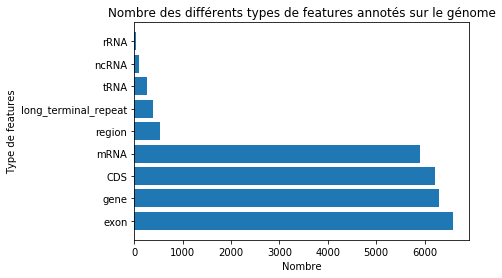

In [30]:
# On récupère le nombre de chaque feature dans le dataframe et on transforme l'objet panda.serie en liste
gff_type_stat = list(gff_df["type"].value_counts())

# On récupère les noms des chaque feature correspondant et on transforme l'objet en liste
gff_type_name = list(gff_df["type"].value_counts().index[:])

# On définit la position des barres pour l'histogramme
x = np.arange(len(gff_type_name))
# On crée le plot en utilisant .barh pour avoir un histogramme horizontal
plt.barh(x, gff_type_stat)
# On redéfinit les étiquettes 
plt.yticks(x, gff_type_name)
# On rajoute une légende à chaque axe
plt.xlabel("Nombre")
plt.ylabel("Type de features")
# On rajoute un titre final à l'histogramme
plt.title("Nombre des différents types de features annotés sur le génome")